Inspect Masks

(4, 481, 607)
bool


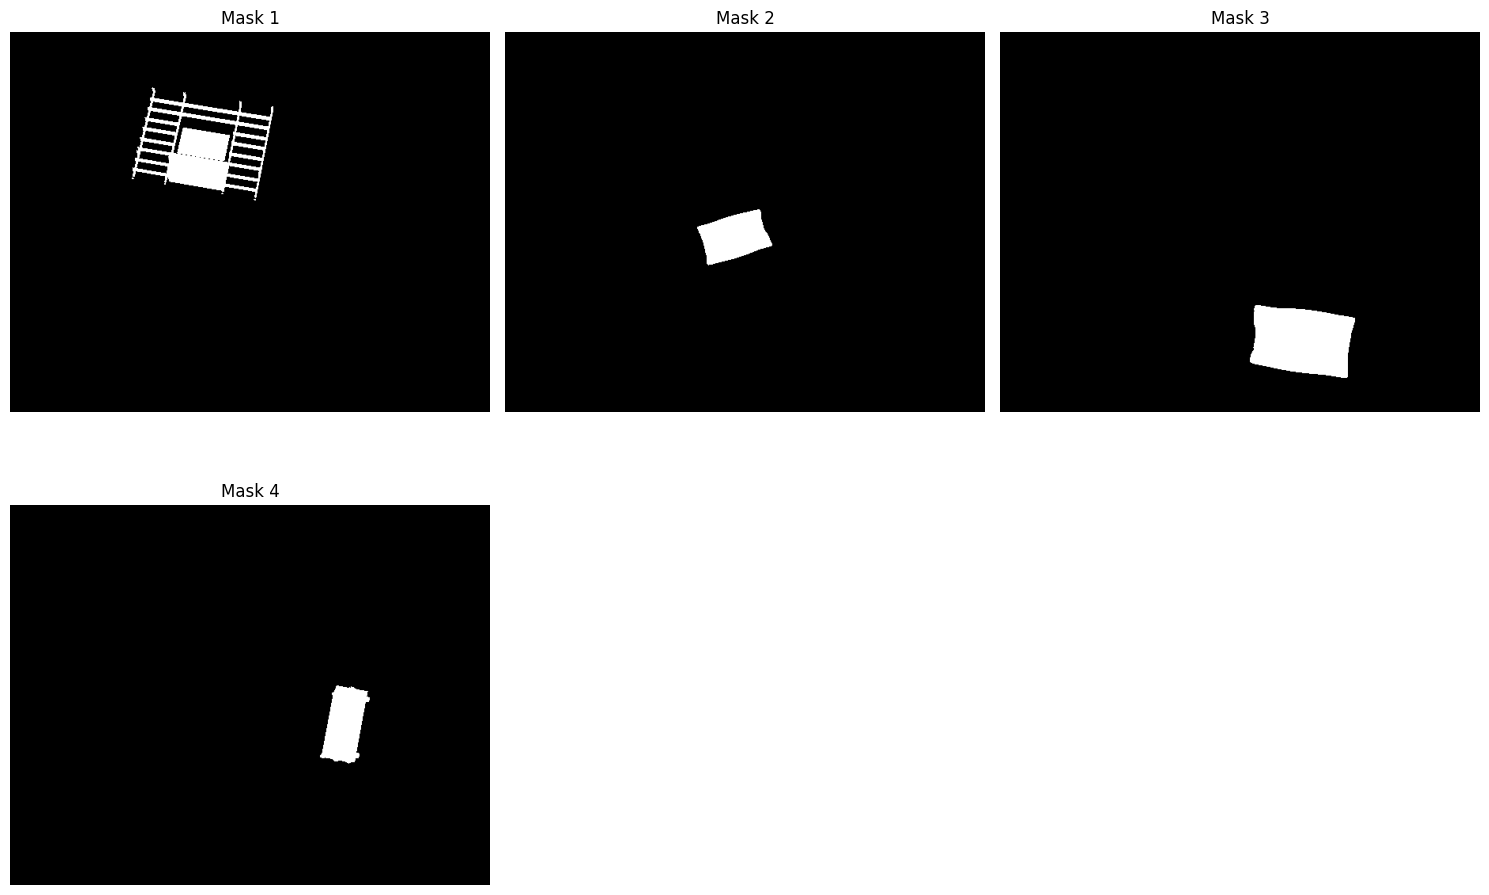

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
mask_data = np.load('/path/yolov8_sereact/original_dataset/8b061a8a-9915-11ee-9103-bbb8eae05561/mask.npy')

# Display the shape and data type of the loaded data
print(mask_data.shape)
print(mask_data.dtype)

def show_mask(mask, title="Mask"):
    plt.imshow(mask, cmap='gray')
    plt.title(title)
    plt.axis('off')

# If there's only one mask
if mask_data.ndim == 2:
    plt.figure()
    show_mask(mask_data)
    plt.show()

# If there are multiple masks
elif mask_data.ndim == 3:
    num_masks = mask_data.shape[0]
    num_cols = 3
    num_rows = (num_masks + num_cols - 1) // num_cols  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten() 

    for i in range(num_masks):
        plt.sca(axes[i])
        show_mask(mask_data[i], title=f"Mask {i+1}")

  
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Preprocess

Reshape the images and masks and save them to the same directory

In [8]:
import os
import numpy as np
import cv2

# Define the root directory containing folders with images and mask.npy files
root_directory = '/path/yolov8_sereact/original_dataset'

# Desired target size for resizing images and masks
target_size = (512, 512)

# Traverse through each folder in the root directory
for folder_name in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder_name)
    
    # Skip files in the root directory (if any)
    if not os.path.isdir(folder_path):
        continue
    
    print(f'Processing folder: {folder_name}')
    
    images = []
    masks = []
    
    # Loop through files in the current folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Load and resize images
        if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg') or filename.lower().endswith('.png'):
            image = cv2.imread(file_path)
            resized_image = cv2.resize(image, target_size)
            
            # Save resized image, overwriting the original
            cv2.imwrite(file_path, resized_image)
            
            print(f'Resized and saved image: {filename}')
        
        # Load and resize masks
        elif filename.lower().endswith('mask.npy'):
            mask = np.load(file_path)
            resized_mask = np.zeros((mask.shape[0], *target_size), dtype=bool)
            for i in range(mask.shape[0]):
                resized_mask[i] = cv2.resize(mask[i].astype(np.uint8), target_size, interpolation=cv2.INTER_NEAREST).astype(bool)
            
            # Save resized mask, overwriting the original
            np.save(file_path, resized_mask)
            
            print(f'Resized and saved mask: {filename}')
    
    # Verification step: Load image and mask, then print their shapes
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Load and print image shape
        if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg') or filename.lower().endswith('.png'):
            image = cv2.imread(file_path)
            print(f'Verified image shape for {filename}: {image.shape}')
        
        # Load and print mask shape
        elif filename.lower().endswith('mask.npy'):
            mask = np.load(file_path)
            print(f'Verified mask shape for {filename}: {mask.shape}')
    
print('All images and masks have been resized, saved, and verified.')


Processing folder: 889a9fb4-9915-11ee-9103-bbb8eae05561
Resized and saved image: rgb.jpg
Resized and saved mask: mask.npy
Verified image shape for rgb.jpg: (512, 512, 3)
Verified mask shape for mask.npy: (20, 512, 512)
Processing folder: 8b061a90-9915-11ee-9103-bbb8eae05561
Resized and saved image: rgb.jpg
Resized and saved mask: mask.npy
Verified image shape for rgb.jpg: (512, 512, 3)
Verified mask shape for mask.npy: (11, 512, 512)
Processing folder: 922c1c97-9915-11ee-9103-bbb8eae05561
Resized and saved image: rgb.jpg
Resized and saved mask: mask.npy
Verified image shape for rgb.jpg: (512, 512, 3)
Verified mask shape for mask.npy: (11, 512, 512)
Processing folder: 8fc581d0-9915-11ee-9103-bbb8eae05561
Resized and saved image: rgb.jpg
Resized and saved mask: mask.npy
Verified image shape for rgb.jpg: (512, 512, 3)
Verified mask shape for mask.npy: (5, 512, 512)
Processing folder: 8fc581d7-9915-11ee-9103-bbb8eae05561
Resized and saved image: rgb.jpg
Resized and saved mask: mask.npy
Ver

Rename the rgb images and csv files with folder names for convinience

In [9]:
import os

def rename_files_in_folders(root_dir):
    # Traverse through each folder in the root directory
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        
        if not os.path.isdir(folder_path):
            continue
        
        print(f'Processing folder: {folder_name}')
        
        # Loop through files in the current folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            
            # Rename the image file
            if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg') or filename.lower().endswith('.png'):
                new_image_name = f"{folder_name}.jpg"
                new_image_path = os.path.join(folder_path, new_image_name)
                os.rename(file_path, new_image_path)
                print(f'Renamed image {filename} to {new_image_name}')
            
            # Rename the CSV file
            elif filename.lower().endswith('.csv'):
                new_csv_name = f"{folder_name}.csv"
                new_csv_path = os.path.join(folder_path, new_csv_name)
                os.rename(file_path, new_csv_path)
                print(f'Renamed CSV {filename} to {new_csv_name}')

    print('All files have been renamed to match their respective folder names.')

root_directory = '/path/yolov8_sereact/original_dataset'
rename_files_in_folders(root_directory)


Processing folder: 889a9fb4-9915-11ee-9103-bbb8eae05561
Renamed image rgb.jpg to 889a9fb4-9915-11ee-9103-bbb8eae05561.jpg
Processing folder: 8b061a90-9915-11ee-9103-bbb8eae05561
Renamed CSV labels_my-project-name_2024-06-17-12-23-26.csv to 8b061a90-9915-11ee-9103-bbb8eae05561.csv
Renamed image rgb.jpg to 8b061a90-9915-11ee-9103-bbb8eae05561.jpg
Processing folder: 922c1c97-9915-11ee-9103-bbb8eae05561
Renamed image rgb.jpg to 922c1c97-9915-11ee-9103-bbb8eae05561.jpg
Processing folder: 8fc581d0-9915-11ee-9103-bbb8eae05561
Renamed image rgb.jpg to 8fc581d0-9915-11ee-9103-bbb8eae05561.jpg
Renamed CSV labels_my-project-name_2024-06-17-02-59-46.csv to 8fc581d0-9915-11ee-9103-bbb8eae05561.csv
Processing folder: 8fc581d7-9915-11ee-9103-bbb8eae05561
Renamed CSV labels_my-project-name_2024-06-17-03-21-32.csv to 8fc581d7-9915-11ee-9103-bbb8eae05561.csv
Renamed image rgb.jpg to 8fc581d7-9915-11ee-9103-bbb8eae05561.jpg
Processing folder: 911224fe-9915-11ee-9103-bbb8eae05561
Renamed image rgb.jpg to 

Create COCO Dataset from the original dataset

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import json
from skimage.measure import find_contours
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from pycocotools import mask as maskUtils

def load_files_and_labels(root_dir):
    data_dict = {}
    
    folder_names = sorted(os.listdir(root_dir))

    for foldername in folder_names:
        folder_path = os.path.join(root_dir, foldername)
        
        if os.path.isdir(folder_path):
            # Initialize dictionary for the current folder
            data_dict[foldername] = {
                'rgb': None,
                'masks': [],
                'bbox': [],
                'labels': []
            }
            
            # Path to foldername.jpg and foldername.csv
            image_path = os.path.join(folder_path, f"{foldername}.jpg")
            csv_path = os.path.join(folder_path, f"{foldername}.csv")
            
            # Load the image file
            if os.path.isfile(image_path):
                data_dict[foldername]['rgb'] = Image.open(image_path)
            
            # Read the CSV file and get the labels and bounding boxes
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                if {'label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height'}.issubset(df.columns):
                    data_dict[foldername]['labels'] = df['label_name'].tolist()
                    bbox_data = df[['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']].values.tolist()
                    validated_bboxes = validate_bounding_boxes(bbox_data)
                    data_dict[foldername]['bbox'] = validated_bboxes
            
            # Path to mask.npy file
            mask_path = os.path.join(folder_path, 'mask.npy')
            
            # Load mask information from mask.npy file
            if os.path.isfile(mask_path):
                mask_data = np.load(mask_path, allow_pickle=True)
                data_dict[foldername]['masks'] = mask_data
    
    return data_dict

def validate_bounding_boxes(bbox_data):
    validated_bboxes = []
    for bbox in bbox_data:
        x, y, width, height = bbox
        if width <= 0 or height <= 0:
            print(f"Invalid bounding box: {bbox}")
            continue
        
        validated_bboxes.append({
            'bbox_x': x,
            'bbox_y': y,
            'bbox_width': width,
            'bbox_height': height
        })
    return validated_bboxes

def mask_to_segmentation(mask_data, image_shape):
    contours = find_contours(mask_data, 0.5)

    segmentations = []
    for contour in contours:

        contour = np.round(contour).astype(np.int32)
        contour = np.flip(contour, axis=1)
        contour = np.flip(contour, axis=0)
        
        # Flatten and convert to list
        segmentation = contour.ravel().tolist()
        segmentations.append(segmentation)
    
    return segmentations

def save_coco_dataset(data, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Create output directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    test_dir = os.path.join(output_dir, 'test')
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Prepare COCO format data
    images = []
    annotations = []
    labels_set = set(label for folder_data in data.values() for label in folder_data['labels'])
    categories = [{'id': i + 1, 'name': label} for i, label in enumerate(labels_set)]
    category_mapping = {label: i + 1 for i, label in enumerate(labels_set)}

    annotation_id = 1
    for image_id, (foldername, folder_data) in enumerate(data.items(), start=1):
        # Extract the RGB image and save it
        rgb_image = folder_data['rgb']
        if rgb_image is not None:
            rand = np.random.random()
            if rand < train_ratio:
                dest_folder = train_dir
            elif rand < train_ratio + val_ratio:
                dest_folder = val_dir
            else:
                dest_folder = test_dir
            
            image_filename = f'image_{image_id}.jpg'
            rgb_image_file = os.path.join(dest_folder, image_filename)
            rgb_image.save(rgb_image_file)


            images.append({
                'id': image_id,
                'width': rgb_image.width,
                'height': rgb_image.height,
                'file_name': os.path.relpath(rgb_image_file, output_dir)
            })


            for i, (label, bbox, mask_data) in enumerate(zip(folder_data['labels'], folder_data['bbox'], folder_data['masks'])):
                # Ensure mask_data is in the correct format for segmentation
                segmentation = mask_to_segmentation(mask_data, rgb_image.size)
                annotations.append({
                    'id': annotation_id,
                    'image_id': image_id,
                    'category_id': category_mapping[label],
                    'bbox': [bbox['bbox_x'], bbox['bbox_y'], bbox['bbox_width'], bbox['bbox_height']],
                    'segmentation': segmentation,
                    'area': bbox['bbox_width'] * bbox['bbox_height'],
                    'iscrowd': 0
                })
                annotation_id += 1

    # Save annotations separately for each set
    for set_dir, set_annotations in [(train_dir, annotations), (val_dir, annotations), (test_dir, annotations)]:
        json_output_file = os.path.join(set_dir, 'coco_annotations.json')
        coco_format = {
            'images': images,
            'annotations': set_annotations,
            'categories': categories
        }
        with open(json_output_file, 'w') as f:
            json.dump(coco_format, f)

    print(f"\nSaved COCO dataset JSON and images to {train_dir}, {val_dir}, {test_dir}")




root_directory = '/path/yolov8_sereact/original_dataset'
output_directory = '/path/sshete/sereact_instance/coco_dataset_images'
data = load_files_and_labels(root_directory)
save_coco_dataset(data, output_directory)


Create yolo dataset using original dataset

In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import yaml

def load_files_and_labels(root_dir):
    data_dict = {}
    
    folder_names = sorted(os.listdir(root_dir))
    
    for foldername in folder_names:
        folder_path = os.path.join(root_dir, foldername)
        
        if os.path.isdir(folder_path):
            # Initialize dictionary for the current folder
            data_dict[foldername] = {
                'rgb': None,
                'masks': [],
                'bbox': [],
                'labels': []
            }
            
            # Path to foldername.jpg and foldername.csv
            image_path = os.path.join(folder_path, f"{foldername}.jpg")
            csv_path = os.path.join(folder_path, f"{foldername}.csv")
            

            if os.path.isfile(image_path):
                data_dict[foldername]['rgb'] = Image.open(image_path)
            
            # Read the CSV file and get the labels and bounding boxes
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                if {'label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height'}.issubset(df.columns):
                    data_dict[foldername]['labels'] = df['label_name'].tolist()
                    bbox_data = df[['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']].values.tolist()
                    validated_bboxes = validate_bounding_boxes(bbox_data)
                    data_dict[foldername]['bbox'] = validated_bboxes
            
            # Path to mask.npy file
            mask_path = os.path.join(folder_path, 'mask.npy')
            
            # Load mask information from mask.npy file
            if os.path.isfile(mask_path):
                mask_data = np.load(mask_path, allow_pickle=True)
                data_dict[foldername]['masks'] = mask_data
    
    return data_dict

def validate_bounding_boxes(bbox_data):
    validated_bboxes = []
    for bbox in bbox_data:
        x, y, width, height = bbox
        if width <= 0 or height <= 0:
            print(f"Invalid bounding box: {bbox}")
            continue
        
        validated_bboxes.append({
            'bbox_x': x,
            'bbox_y': y,
            'bbox_width': width,
            'bbox_height': height
        })
    return validated_bboxes

def convert_bbox_to_yolo(bbox, image_width, image_height):
    x_center = (bbox['bbox_x'] + bbox['bbox_width'] / 2) / image_width
    y_center = (bbox['bbox_y'] + bbox['bbox_height'] / 2) / image_height
    width = bbox['bbox_width'] / image_width
    height = bbox['bbox_height'] / image_height
    return [x_center, y_center, width, height]

def mask_to_segmentation(mask_data, image_shape):
    contours = find_contours(mask_data, 0.5)

    segmentations = []
    for contour in contours:

        contour = np.round(contour).astype(np.int32)
        contour = np.flip(contour, axis=1)
        contour = np.flip(contour, axis=0)
        
        # Flatten and convert to list
        segmentation = contour.ravel().tolist()
        segmentations.append(segmentation)
    
    return segmentations

def save_dataset_to_yolo_format(data, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Create output directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    test_dir = os.path.join(output_dir, 'test')
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    labels_train_dir = os.path.join(train_dir, 'labels')
    images_train_dir = os.path.join(train_dir, 'images')
    os.makedirs(labels_train_dir, exist_ok=True)
    os.makedirs(images_train_dir, exist_ok=True)
    
    labels_val_dir = os.path.join(val_dir, 'labels')
    images_val_dir = os.path.join(val_dir, 'images')
    os.makedirs(labels_val_dir, exist_ok=True)
    os.makedirs(images_val_dir, exist_ok=True)
    
    labels_test_dir = os.path.join(test_dir, 'labels')
    images_test_dir = os.path.join(test_dir, 'images')
    os.makedirs(labels_test_dir, exist_ok=True)
    os.makedirs(images_test_dir, exist_ok=True)
    
    # Prepare YOLO format data
    labels_output_dirs = {
        'train': labels_train_dir,
        'val': labels_val_dir,
        'test': labels_test_dir
    }

    images_output_dirs = {
        'train': images_train_dir,
        'val': images_val_dir,
        'test': images_test_dir
    }
    
    labels_set = set(label for folder_data in data.values() for label in folder_data['labels'])
    categories = [{'id': i + 1, 'name': label} for i, label in enumerate(labels_set)]
    category_mapping = {label: i + 1 for i, label in enumerate(labels_set)}

    for image_id, (foldername, folder_data) in enumerate(data.items(), start=1):
        rgb_image = folder_data['rgb']
        if rgb_image is not None:
            image_width, image_height = rgb_image.size
            
            # Determine the destination folder based on split ratio
            rand = np.random.random()
            if rand < train_ratio:
                dest_folder = 'train'
            elif rand < train_ratio + val_ratio:
                dest_folder = 'val'
            else:
                dest_folder = 'test'

            # Save the image
            image_filename = f'image_{image_id}.jpg'
            image_file_path = os.path.join(images_output_dirs[dest_folder], image_filename)
            rgb_image.save(image_file_path)

            # Prepare annotation file
            yolo_annotation_file = os.path.join(labels_output_dirs[dest_folder], f'image_{image_id}.txt')
            with open(yolo_annotation_file, 'w') as f:
                for label, bbox in zip(folder_data['labels'], folder_data['bbox']):
                    # Convert bbox to YOLO format
                    yolo_bbox = convert_bbox_to_yolo(bbox, image_width, image_height)
                    category_id = category_mapping[label] - 1  
                    f.write(f"{category_id} {' '.join(map(str, yolo_bbox))}\n")

    # Create data.yaml file
    data_yaml = {
        'train': os.path.relpath(train_dir, output_dir),
        'val': os.path.relpath(val_dir, output_dir),
        'test': os.path.relpath(test_dir, output_dir),
        'nc': len(labels_set),
        'names': list(labels_set)
    }

    data_yaml_file = os.path.join(output_dir, 'data.yaml')
    with open(data_yaml_file, 'w') as f:
        yaml.dump(data_yaml, f, default_flow_style=False)

    print(f"\nSaved YOLO dataset to {output_dir}")
    print(f"data.yaml file saved to {data_yaml_file}")


root_directory = '/path/yolov8_sereact/original_dataset'
output_directory = 'yolo_dataset'
data = load_files_and_labels(root_directory)
save_dataset_to_yolo_format(data, output_directory)



Saved YOLO dataset to yolo_dataset_t
data.yaml file saved to yolo_dataset_t/data.yaml


For COCO dataset: Load the dataset from coco and transform train images using Albumentation and load the data using dataloader

In [14]:
import os
import cv2
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO 

# Define augmentation pipeline for both images and masks
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2),
    ToTensorV2()
])

# Custom Dataset class for COCO format dataset
class COCODataset(Dataset):
    def __init__(self, data_dir, split='train', transform=None):
        self.data_dir = os.path.join(data_dir, split)
        self.annotation_file = os.path.join(self.data_dir, 'coco_annotations.json')
        self.transform = transform
        self.coco = COCO(self.annotation_file) 
        self.image_ids = self.coco.getImgIds() 

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(img_id)[0]
        image_path = os.path.join(self.data_dir, image_info['file_name'])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        annotations = self.coco.loadAnns(ann_ids)

        mask = np.zeros((image.shape[0], image.shape[1], len(annotations)), dtype=np.uint8)
        for i, ann in enumerate(annotations):
            seg_mask = self.coco.annToMask(ann)
            mask[:, :, i] = seg_mask

        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']

        return image, mask

# Example usage
data_dir = '/path/sshete/sereact_instance/coco_dataset_images'

# Create train dataset and dataloader
train_dataset = COCODataset(data_dir, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Create val dataset and dataloader
val_dataset = COCODataset(data_dir, split='val', transform=False)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Create test dataset and dataloader
test_dataset = COCODataset(data_dir, split='test', transform=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)




loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


For YOLO dataset: Load the dataset from yolo dataset and transform train images using Albumentation and load the data using dataloader

In [15]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import yaml

class YOLODataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform

        # Load class names from data.yaml
        with open(os.path.join(root_dir, 'data.yaml'), 'r') as f:
            data_config = yaml.safe_load(f)
        self.class_names = data_config['names']

        # List all image files
        self.image_files = sorted([file for file in os.listdir(os.path.join(root_dir, split, 'images')) if file.endswith(('jpg', 'jpeg', 'png'))])

        # Define Albumentations transformations
        self.augmentation = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomRotate90(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.RandomGamma(p=0.2),
            ToTensorV2()
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.root_dir, self.split, 'images', img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load corresponding label file
        label_file = os.path.join(self.root_dir, self.split, 'labels', os.path.splitext(img_name)[0] + '.txt')

        targets = []
        with open(label_file, 'r') as f:
            labels = f.readlines()

        # Parse labels into numpy array
        for label in labels:
            class_index, center_x, center_y, width, height = map(float, label.strip().split())
            targets.append([class_index, center_x, center_y, width, height])
            
        targets = np.array(targets)


        if self.transform:
            transformed = self.transform(image=image, bboxes=targets[:, 1:], class_labels=targets[:, 0])
            image = transformed['image']
            targets = np.hstack((np.expand_dims(transformed['class_labels'], axis=1), transformed['bboxes']))

        return image, targets


data_dir = '/path/sshete/sereact_instance/yolov8_instance/yolo_dataset'

# Create Albumentations transform
transform = A.Compose([
    A.LongestMaxSize(max_size=416, p=1.0),
    A.PadIfNeeded(min_height=416, min_width=416, border_mode=cv2.BORDER_CONSTANT, value=[0, 0, 0], p=1.0),
    A.RandomCrop(height=416, width=416, p=1.0),
    ToTensorV2()
])

# Create train dataset and dataloader
train_dataset = YOLODataset(data_dir, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)


